In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re, os, pickle
from collections import defaultdict
import pandas as pd

In [2]:
list_of_models = [item for item in os.listdir() if 'pkl' in item]

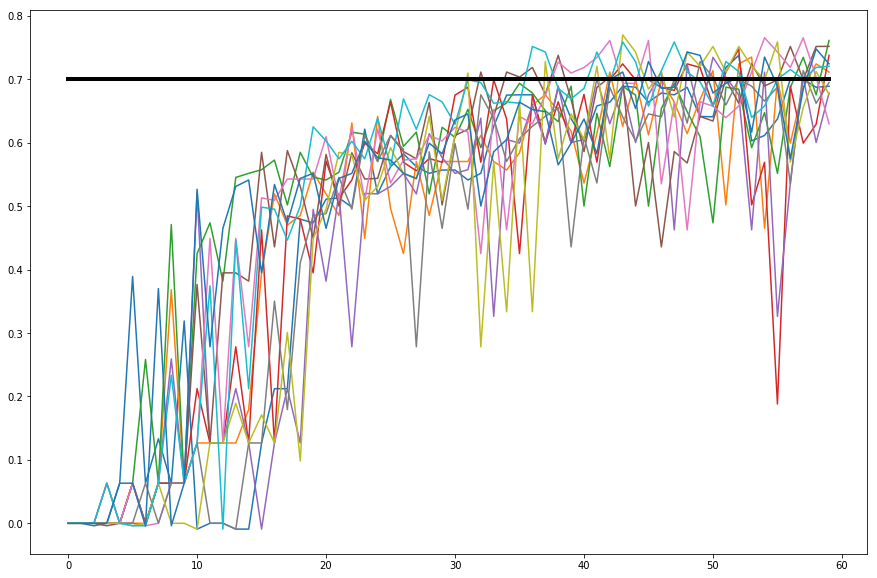

In [5]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}

fig = plt.figure(figsize=(15, 10))
for model_ in list_of_models:
    with open(model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        
        plt.plot(metric_dict['val_mcc_k'])
plt.plot(np.zeros((60))+0.7, linewidth = 4, color = 'black')
plt.show()

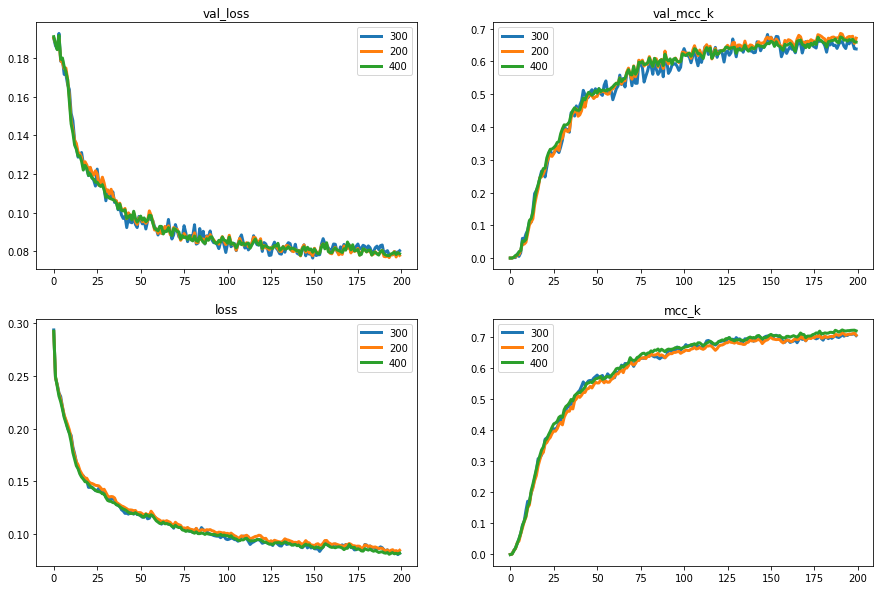

In [4]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}


for model_ in list_of_models:
    with open(model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        
        projection_dict.setdefault(model_data['feature_config']['time_steps'], []).append(metric_dict)

fig = plt.figure(figsize=(15, 10))
for st_ in enumerate(metrics):   
    plt.subplot(2, 2, st_[0] + 1)
    qu1 = []
    qu2 = []
    for key in projection_dict.keys():
        for item in projection_dict[key]:
            qu1.append(item[st_[1]])
        thing1 = np.mean(np.squeeze(np.array(qu1)), axis = 0)
#         thing2 = np.mean(np.squeeze(np.array(qu2)), axis = 0)
        plt.plot(thing1, label = key, linewidth = 3)
#         plt.plot(thing2, label = key, linewidth = 1)
    plt.title(st_[1])
    plt.legend()

In [5]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}


for model_ in list_of_models:
    with open(model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        

        projection_dict.setdefault(model_data['feature_config']['spectrogram_freq_bins']
                                       , []).append(metric_dict)
            

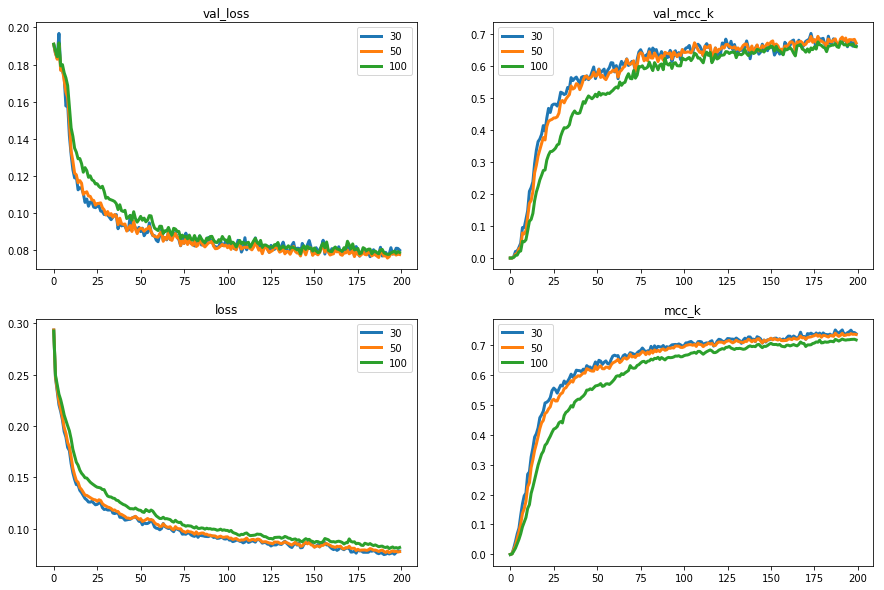

In [6]:
fig = plt.figure(figsize=(15, 10))
for st_ in enumerate(metrics):   
    plt.subplot(2, 2, st_[0] + 1)
    qu1 = []
    qu2 = []
    for key in projection_dict.keys():
        for item in projection_dict[key]:
            qu1.append(item[st_[1]])
        thing1 = np.mean(np.squeeze(np.array(qu1)), axis = 0)
#         thing2 = np.mean(np.squeeze(np.array(qu2)), axis = 0)
        plt.plot(thing1, label = key, linewidth = 3)
#         plt.plot(thing2, label = key, linewidth = 1)
    plt.title(st_[1])
    plt.legend()

In [7]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}


for model_ in list_of_models:
    with open(model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        

        projection_dict.setdefault(model_data['model_config']['hu1'], []).append(metric_dict)




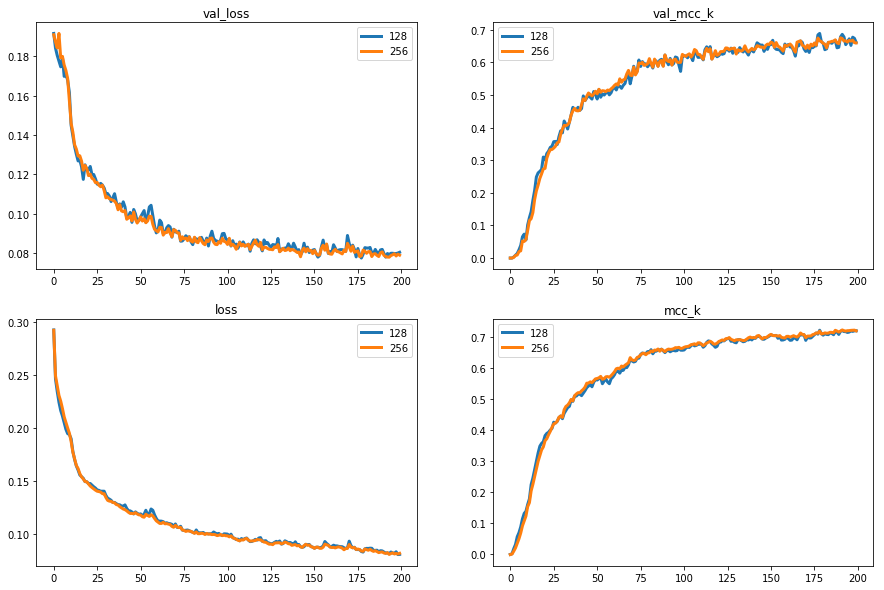

In [8]:
fig = plt.figure(figsize=(15, 10))
for st_ in enumerate(metrics):   
    plt.subplot(2, 2, st_[0] + 1)
    qu1 = []
    qu2 = []
    for key in projection_dict.keys():
        for item in projection_dict[key]:
            qu1.append(item[st_[1]])
        thing1 = np.mean(np.squeeze(np.array(qu1)), axis = 0)
        plt.plot(thing1, label = key, linewidth = 3)
    plt.title(st_[1])
    plt.legend()

# Evaluating submission for FEB12

In [16]:
def show_models(list_of_potential_models):
    list_of_models = [laitem for item in list_of_potential_models for laitem in os.listdir() if item in laitem]

    plot_dict = dict.fromkeys(list_of_models)
    for model_ in list_of_models:
        with open(model_, 'rb') as fp:
            model_data = pickle.load(fp)

            metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}


            for metric in metrics:
                for k,v in model_data['training'].items():
                    metric_dict[metric] += v['results'][metric]

            plot_dict[model_] = metric_dict

    for mod_name,vall in plot_dict.items():
        plt.figure(figsize=(18,4))
        plt.subplot(1, 2, 1)
        plt.plot(vall['loss'], label = 'test')
        plt.plot(vall['val_loss'], label = 'val')
        plt.title(re.findall("([\w]*)_", mod_name)[0]+'_loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(vall['val_mcc_k'], label = 'test')
        plt.plot(vall['mcc_k'], label = 'val')
        plt.title(re.findall("([\w]*)_", mod_name)[0]+'_mcc')
        plt.legend()

        plt.show()


In [9]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}


model_analyis = []
for model_ in list_of_models:
    with open(model_, 'rb') as fp:
        tt = []
        cols = []
        
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        
        
        for k,v in metric_dict.items():
            cols += [str(k) + '_ave',str(k) + '_max',str(k) + '_std',str(k) + '_sum']
            tt+=(np.mean(v), np.max(v), np.std(v), np.sum(v))
    tt.insert(0,re.findall("/([a-z0-9A-Z]*)",model_data['file_name'])[0])
    cols.insert(0,'name')
    model_analyis.append(tt)


In [10]:
df = pd.DataFrame(model_analyis, columns=cols)

In [11]:
df.sort_values(by = ['val_mcc_k_sum', 'mcc_k_sum', 'val_mcc_k_ave'], ascending = [False, False, False]).head(10)

,name,val_loss_ave,val_loss_max,val_loss_std,val_loss_sum,val_mcc_k_ave,val_mcc_k_max,val_mcc_k_std,val_mcc_k_sum,loss_ave,loss_max,loss_std,loss_sum,mcc_k_ave,mcc_k_max,mcc_k_std,mcc_k_sum
28,21909AT,0.081932,0.204779,0.020844,16.386403,0.658882,0.804220,0.161484,131.776393,0.096430,0.290896,0.030291,19.286015,0.671129,0.803834,0.133643,134.225838
98,21910AY,0.085264,0.214319,0.023081,17.052752,0.653990,0.768651,0.150584,130.797914,0.097245,0.304297,0.030487,19.448972,0.672378,0.798510,0.137218,134.475588
40,21910AS,0.085568,0.231060,0.026499,17.113501,0.642531,0.774641,0.189893,128.506155,0.095599,0.267058,0.033889,19.119740,0.671371,0.810498,0.157003,134.274260
18,21910AG,0.082507,0.181610,0.022075,16.501445,0.627566,0.802205,0.163223,125.513246,0.093246,0.277454,0.031333,18.649236,0.672772,0.787904,0.133637,134.554354
50,21909AH,0.083603,0.240343,0.021728,16.720647,0.625509,0.807647,0.159416,125.101884,0.088693,0.269588,0.027518,17.738631,0.693101,0.778274,0.119611,138.620199
56,21910AP,0.087087,0.262304,0.026799,17.417381,0.623558,0.774641,0.179157,124.711605,0.098041,0.284237,0.033109,19.608240,0.656418,0.785292,0.161593,131.283628
73,21910BA,0.086248,0.191236,0.023770,17.249619,0.622160,0.762480,0.196234,124.431936,0.100705,0.304861,0.035855,20.141026,0.649081,0.801147,0.173406,129.816169
58,21910AT,0.086243,0.187451,0.022315,17.248615,0.615654,0.778559,0.186836,123.130850,0.099827,0.273020,0.031288,19.965345,0.658676,0.792132,0.151169,131.735170
6,21910AM,0.088322,0.223287,0.023207,17.664485,0.611628,0.792518,0.163633,122.325636,0.097979,0.282433,0.029993,19.595897,0.650202,0.777509,0.151169,130.040391
107,21909AE,0.086739,0.220349,0.028201,17.347817,0.607242,0.803608,0.188544,121.448335,0.099489,0.312395,0.036082,19.897738,0.649151,0.777379,0.154671,129.830274


In [20]:
df.sort_values(by = ['val_mcc_k_max'], ascending = [False]).head(10)

,name,val_loss_ave,val_loss_max,val_loss_std,val_loss_sum,val_mcc_k_ave,val_mcc_k_max,val_mcc_k_std,val_mcc_k_sum,loss_ave,loss_max,loss_std,loss_sum,mcc_k_ave,mcc_k_max,mcc_k_std,mcc_k_sum
84,21909BA,0.091013,0.195355,0.026879,18.202543,0.567222,0.828754,0.210207,113.444419,0.115357,0.312032,0.034114,23.071425,0.569542,0.755527,0.176166,113.908300
20,21909AP,0.092601,0.286004,0.037301,18.520112,0.572290,0.820671,0.230154,114.457953,0.109837,0.287951,0.043117,21.967479,0.599290,0.773303,0.205059,119.858002
52,21909AS,0.092929,0.194111,0.029966,18.585869,0.575445,0.820671,0.198561,115.089079,0.111931,0.314188,0.035801,22.386203,0.599366,0.756782,0.170477,119.873272
61,21908AN,0.094201,0.211118,0.032538,18.840252,0.511220,0.815545,0.254788,102.243946,0.120972,0.298881,0.041202,24.194477,0.519772,0.716197,0.208446,103.954413
64,21908AY,0.105768,0.216996,0.040752,21.153696,0.417412,0.813608,0.319936,83.482485,0.140872,0.297799,0.050919,28.174373,0.393086,0.736728,0.289033,78.617119
74,21909AK,0.088938,0.197254,0.026660,17.787560,0.571139,0.812333,0.217024,114.227796,0.104450,0.286934,0.036071,20.890040,0.606960,0.758640,0.203075,121.391998
50,21909AH,0.083603,0.240343,0.021728,16.720647,0.625509,0.807647,0.159416,125.101884,0.088693,0.269588,0.027518,17.738631,0.693101,0.778274,0.119611,138.620199
57,21909AN,0.086665,0.217929,0.027255,17.333039,0.597318,0.807413,0.184546,119.463519,0.100348,0.309731,0.036927,20.069565,0.638136,0.787046,0.163722,127.627194
41,21908AT,0.098765,0.209164,0.031496,19.753064,0.498464,0.804661,0.279643,99.692801,0.122922,0.274168,0.039769,24.584300,0.495321,0.752673,0.242368,99.064114
28,21909AT,0.081932,0.204779,0.020844,16.386403,0.658882,0.804220,0.161484,131.776393,0.096430,0.290896,0.030291,19.286015,0.671129,0.803834,0.133643,134.225838


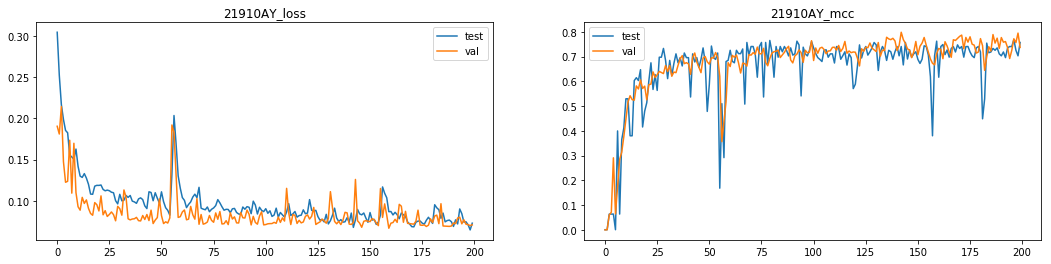

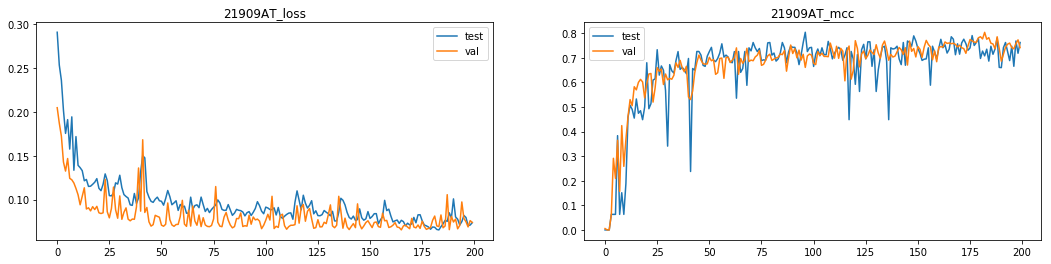

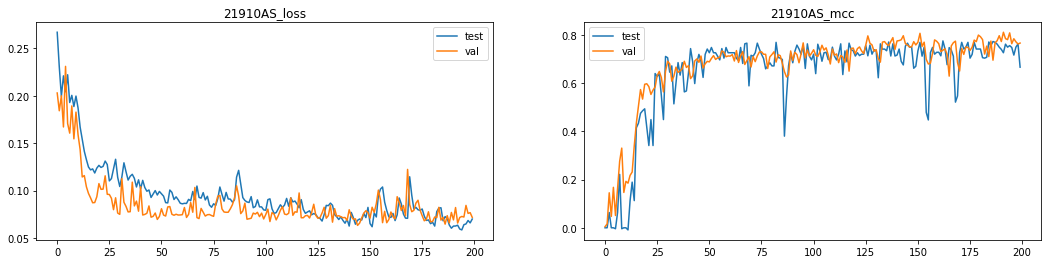

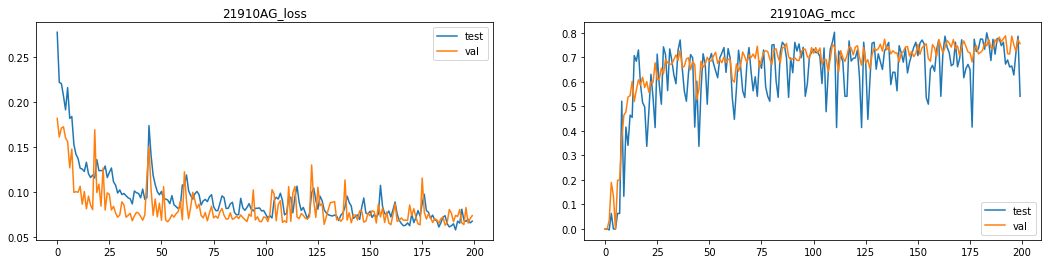

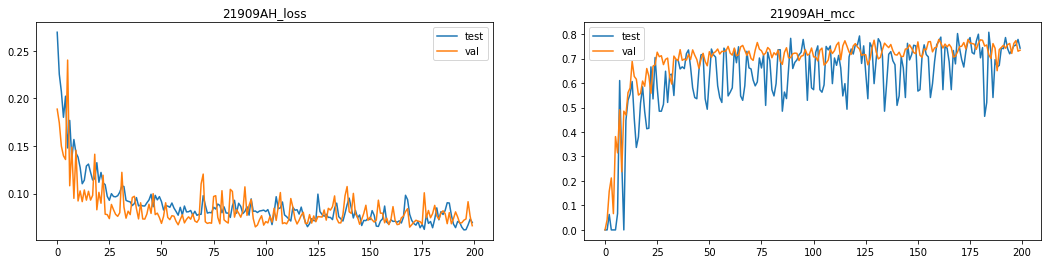

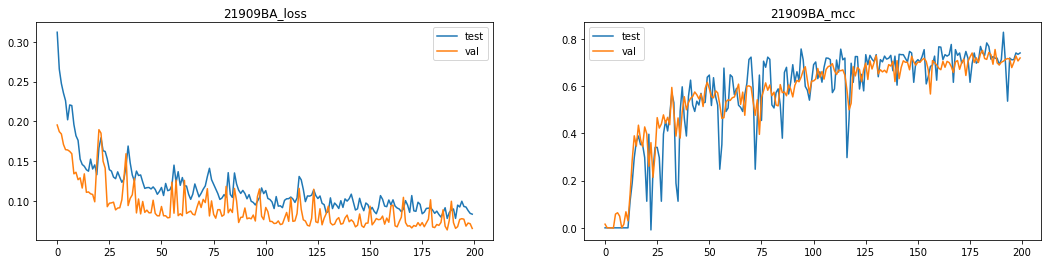

In [21]:
show_models(['21910AY', '21909AT','21910AS', '21910AG', '21909AH', '21909BA'])

In [121]:
from sklearn.cluster import KMeans

In [128]:
km = KMeans(n_clusters = 5).fit(df.drop(labels=['name'], axis = 1))

In [129]:
km.labels_

array([2, 2, 2, 2, 0, 4, 2, 1, 2, 4, 4, 1, 4, 2, 2, 4, 1, 1, 2, 0, 4, 0,
       4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 1, 2, 0, 2, 2, 2, 0, 4, 2, 0, 4, 4,
       0, 2, 2, 2, 2, 4, 2, 4, 4, 0, 4, 0, 2, 2, 2, 4, 0, 0, 0, 0, 1, 2,
       4, 2, 2, 4, 2, 0, 4, 2, 4, 0, 2, 0, 3, 4, 1, 2, 3, 4, 4, 4, 2, 4,
       0, 2, 0, 0, 4, 1, 0, 0, 4, 2, 2, 4, 1, 4, 4, 4, 2, 4, 4, 2],
      dtype=int32)